In [1]:
import argparse
import numpy as np
import os
from math import log10, floor
from datetime import datetime
from glob import glob
import stat
import pickle
import math
import array
import scipy
from multiprocessing import Pool
from itertools import repeat
from pathlib import Path
from scipy.signal import correlate
from scipy.fft import ifft, fft, next_fast_len
import qetpy as qp
import matplotlib
import matplotlib.pyplot as plt
import pytesdaq.io.hdf5 as h5io
import yaml
import pytesdaq
from detprocess.core import OptimumFilterTrigger, EventBuilder, Template, Noise, Salting
from detprocess import utils,FilterData
from pprint import pprint
from scipy import stats, signal, interpolate, special, integrate
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import types
import mendeleev
import pickle as pkl
import sys
from darklim import constants

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


In [2]:
#yaml_dict = yaml.load(open('/home/michael/salting/detprocess/examples/processing/process_example.yaml', 'r'), Loader=utils._UniqueKeyLoader)
#salting_dict = yaml_dict['salting']
filter_file = "/home/michael/salting/detprocess/examples/r46testfilterfile.hdf5"
didv_file = "/home/michael/salting/run46tests/pylelab_run46_analysis/didvBOTHCHAN.hdf5"

In [3]:

pdf_file = "/home/michael/salting/detprocess/examples/mass_dict.pkl"


In [4]:
salting = Salting(filter_file, didv_file,verbose=True)

In [5]:
series = None
restricted=False
salting.set_raw_data_path(group_path="/data/ucb/pylelab/run46/raw/continuous_I2_D20240620_T165135",
                            series=series,
                            restricted=restricted)

In [6]:
template = Template()
template.load_hdf5('./r46testfilterfile.hdf5')
template.describe()

INFO: Loading filter data from file ./r46testfilterfile.hdf5
List of channels: ['Mv3025pcRegular|Mv3025pcBigFins', 'Mv3025pcRegular', 'Mv3025pcBigFins']

Channel Mv3025pcRegular|Mv3025pcBigFins:
 * Tag "default":
    csd: 3D numpy.array  (2, 2, 25000)
 * Tag "freqs_default":
    csd: pandas.Series (25000,)
 * Tag "shared_2x2":
    template: 3D numpy.array  (2, 2, 25000)
 * Tag "shared_Mv3025pcBigFins":
    template: 3D numpy.array  (2, 1, 25000)
 * Tag "shared_Mv3025pcRegular":
    template: 3D numpy.array  (2, 1, 25000)
 * Tag "single_Mv3025pcBigFins":
    template: 3D numpy.array  (2, 1, 25000)
 * Tag "single_Mv3025pcRegular":
    template: 3D numpy.array  (2, 1, 25000)

Channel Mv3025pcRegular:
 * Tag "default":
    psd: pandas.Series (25000,)
    template: pandas.Series (25000,)
 * Tag "singles":
    template: pandas.Series (25000,)

Channel Mv3025pcBigFins:
 * Tag "default":
    psd: pandas.Series (25000,)
    template: pandas.Series (25000,)
 * Tag "singles":
    template: pandas

In [7]:
chan = "Mv3025pcRegular|Mv3025pcBigFins"
template_tag = "shared_Mv3025pcRegular"
noise_tag = "default"
pce = [0.4, 0.3]
dpdi_tag = "default"
dpdi_poles = 3

In [8]:
energies=None
#if 'energies' in chan_config:
#    energies = chan_config['energies']


In [9]:
salts,filtsalts = salting.generate_salt(chan,
                        noise_tag=noise_tag,
                        template_tag=template_tag,
                        dpdi_tag=dpdi_tag,
                        dpdi_poles=dpdi_poles,
                        energies=energies,
                        PCE = pce,
                        pdf_file=pdf_file,
                        nevents=20)

INFO: Loading filter data from file /home/michael/salting/detprocess/examples/r46testfilterfile.hdf5
dict_keys(['Mv3025pcRegular|Mv3025pcBigFins', 'Mv3025pcRegular', 'Mv3025pcBigFins'])
dict_keys(['csd_default', 'csd_default_metadata', 'csd_freqs_default', 'csd_freqs_default_metadata', 'template_shared_2x2_inds', 'template_shared_2x2_inds_metadata', 'template_shared_2x2', 'template_shared_2x2_metadata', 'template_shared_Mv3025pcBigFins_inds', 'template_shared_Mv3025pcBigFins_inds_metadata', 'template_shared_Mv3025pcBigFins', 'template_shared_Mv3025pcBigFins_metadata', 'template_shared_Mv3025pcRegular_inds', 'template_shared_Mv3025pcRegular_inds_metadata', 'template_shared_Mv3025pcRegular', 'template_shared_Mv3025pcRegular_metadata', 'template_single_Mv3025pcBigFins_inds', 'template_single_Mv3025pcBigFins_inds_metadata', 'template_single_Mv3025pcBigFins', 'template_single_Mv3025pcBigFins_metadata', 'template_single_Mv3025pcRegular_inds', 'template_single_Mv3025pcRegular_inds_metadata', 

In [10]:
salts[1][1]

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.16474507e-16, 1.16374421e-16, 1.16274422e-16])]

In [11]:
temp ,time = salting.get_template("Mv3025pcRegular|Mv3025pcBigFins","shared_Mv3025pcRegular")

dict_keys(['Mv3025pcRegular|Mv3025pcBigFins', 'Mv3025pcRegular', 'Mv3025pcBigFins'])
dict_keys(['csd_default', 'csd_default_metadata', 'csd_freqs_default', 'csd_freqs_default_metadata', 'template_shared_2x2_inds', 'template_shared_2x2_inds_metadata', 'template_shared_2x2', 'template_shared_2x2_metadata', 'template_shared_Mv3025pcBigFins_inds', 'template_shared_Mv3025pcBigFins_inds_metadata', 'template_shared_Mv3025pcBigFins', 'template_shared_Mv3025pcBigFins_metadata', 'template_shared_Mv3025pcRegular_inds', 'template_shared_Mv3025pcRegular_inds_metadata', 'template_shared_Mv3025pcRegular', 'template_shared_Mv3025pcRegular_metadata', 'template_single_Mv3025pcBigFins_inds', 'template_single_Mv3025pcBigFins_inds_metadata', 'template_single_Mv3025pcBigFins', 'template_single_Mv3025pcBigFins_metadata', 'template_single_Mv3025pcRegular_inds', 'template_single_Mv3025pcRegular_inds_metadata', 'template_single_Mv3025pcRegular', 'template_single_Mv3025pcRegular_metadata'])


In [12]:
time

array([0.00000e+00, 8.00000e-07, 1.60000e-06, ..., 1.99976e-02,
       1.99984e-02, 1.99992e-02])

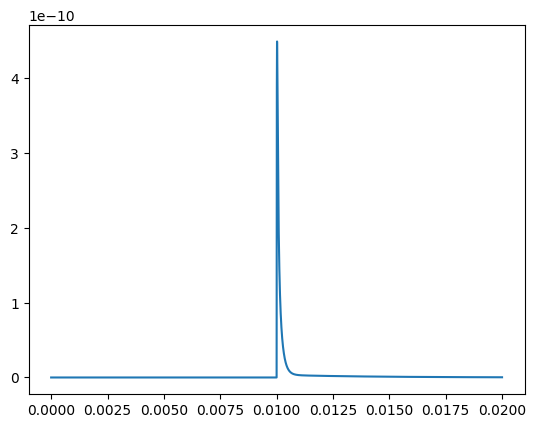

In [13]:
plt.plot(time,salts[0][0][0])

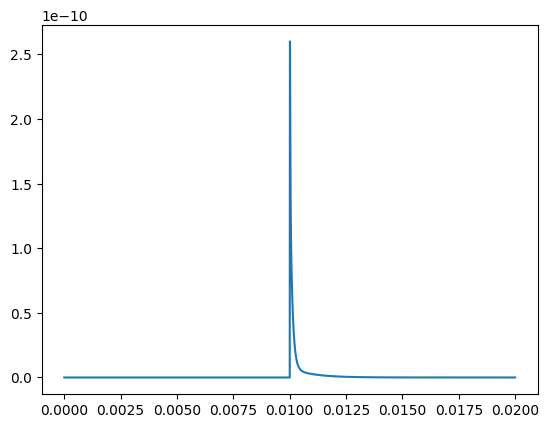

In [14]:
plt.plot(time,salts[0][1][0])

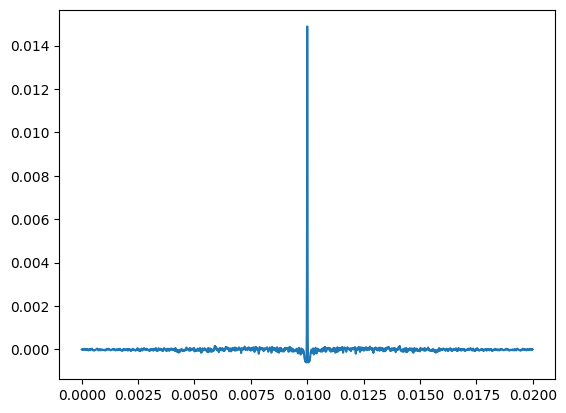

In [15]:
plt.plot(time,filtsalts[0][0][0])

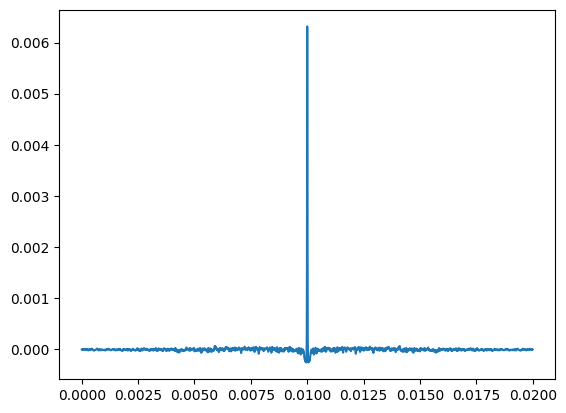

In [16]:
plt.plot(time,filtsalts[0][1][0])

In [17]:
ahh = salting.get_DMenergies()

In [18]:
salting_dataframe = salting.get_dataframe()

In [ ]:
salting_dataframe

#,series_number,event_number,dump_number,event_time,series_start_time,group_start_time,fridge_run_start_time,fridge_run_number,trigger_index,trigger_time,trigger_type,data_type,group_name,processing_id,trigger_prod_id,trigger_prod_group_name,salt_template_tag,salt_dm_mass_MeV,salt_recoil_energy_eV,salt_amplitude_Mv3025pcRegular,salt_amplitude_Mv3025pcBigFins,salt_filt_amplitude_Mv3025pcRegular,salt_filt_amplitude_Mv3025pcBigFins,salt_energy_eV_Mv3025pcRegular,salt_energy_eV_Mv3025pcBigFins
0,220240620165258,100001,1,1718927591,13,95,291191,46,674167,0.5393336,3,Test,continuous_I2_D20240620_T165135,nan,1,nan,shared_Mv3025pcRegular,10,0.058241102622433295,4.486989203993542e-10,2.600063267408871e-10,0.014877896112924234,0.006313908702036813,0.03719474028231058,0.02104636234012271
1,220240620165258,100001,1,1718927591,13,95,291191,46,811217,0.6489736,3,Test,continuous_I2_D20240620_T165135,nan,2,nan,shared_Mv3025pcRegular,10,0.02485788117465176,1.2027468536083665e-10,1.8392299558934093e-10,0.003988051213095259,0.004466325942574085,0.009970128032738146,0.014887753141913616
2,220240620165258,100001,1,1718927591,13,95,291191,46,1150101,0.9200808,3,Test,continuous_I2_D20240620_T165135,nan,3,nan,shared_Mv3025pcRegular,10,0.1036260718684597,7.968307104687503e-10,4.6417691347870686e-10,0.02642120136903886,0.011271920533758766,0.06605300342259715,0.037573068445862556
3,220240620165258,100001,1,1718927593,15,97,291193,46,3446359,2.7570872,3,Test,continuous_I2_D20240620_T165135,nan,4,nan,shared_Mv3025pcRegular,10,0.08515500550388551,4.659121287792498e-10,5.748724465392847e-10,0.015448649271452609,0.013960014697576194,0.03862162317863152,0.04653338232525398
4,220240620165258,100001,1,1718927594,16,98,291194,46,4965099,3.9720792,3,Test,continuous_I2_D20240620_T165135,nan,5,nan,shared_Mv3025pcRegular,10,0.076464789688174,5.853097070653811e-10,3.4524116985317795e-10,0.019407617490709232,0.008383723788420273,0.04851904372677308,0.02794574596140091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,220240620165258,300008,3,1718927883,305,387,291483,46,4026141,3.2209128,3,Test,continuous_I2_D20240620_T165135,nan,356,nan,shared_Mv3025pcRegular,900,18.657698419524465,8.061862198042943e-08,1.4793699965225082e-07,2.6731410040487926,3.592453772820745,6.682852510121982,11.974845909402484
356,220240620165258,300008,3,1718927885,307,389,291485,46,6000200,4.80016,3,Test,continuous_I2_D20240620_T165135,nan,357,nan,shared_Mv3025pcRegular,900,25.822492401976543,1.5040381320029583e-07,1.6498518152205032e-07,4.9870686245245635,4.006446252199541,12.467671561311407,13.354820840665138
357,220240620165258,300008,3,1718927887,309,391,291487,46,9239342,7.3914736,3,Test,continuous_I2_D20240620_T165135,nan,358,nan,shared_Mv3025pcRegular,900,26.412961705285014,5.478448979077714e-08,2.7020154978097214e-07,1.8165364583032628,6.561486167858057,4.541341145758157,21.871620559526857
358,220240620165258,300008,3,1718927887,309,391,291487,46,9349306,7.4794448,3,Test,continuous_I2_D20240620_T165135,nan,359,nan,shared_Mv3025pcRegular,900,70.94191485667714,4.5007210199400487e-07,4.155056532441074e-07,14.92342787638649,10.090003549713273,37.30856969096622,33.633345165710914


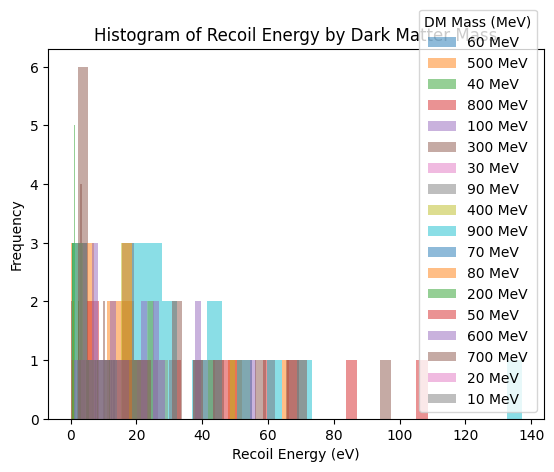

In [20]:
for dm_mass in salting_dataframe['salt_dm_mass_MeV'].unique():
    # Filter the data for the current dark matter mass
    filtered_data = salting_dataframe[salting_dataframe['salt_dm_mass_MeV'] == dm_mass]
    
    # Plot histogram for 'salt_recoil_energy_eV' for the current dark matter mass
    plt.hist(filtered_data['salt_recoil_energy_eV'], bins=30, alpha=0.5, label=f"{dm_mass} MeV")
    
# Add legend and labels
plt.xlabel('Recoil Energy (eV)')
plt.ylabel('Frequency')
plt.title('Histogram of Recoil Energy by Dark Matter Mass')
plt.legend(title='DM Mass (MeV)')
plt.show()

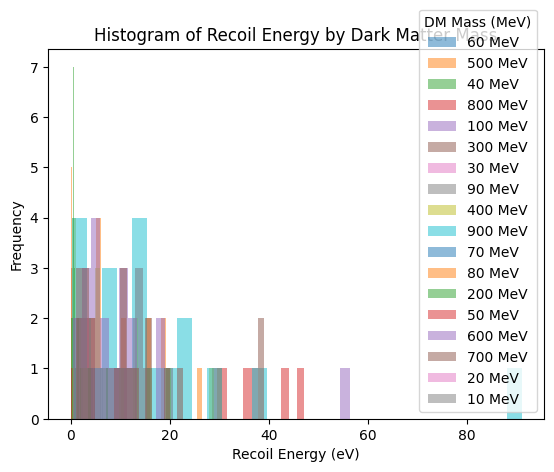

In [21]:
for dm_mass in salting_dataframe['salt_dm_mass_MeV'].unique():
    # Filter the data for the current dark matter mass
    filtered_data = salting_dataframe[salting_dataframe['salt_dm_mass_MeV'] == dm_mass]
    
    # Plot histogram for 'salt_recoil_energy_eV' for the current dark matter mass
    plt.hist(filtered_data['salt_energy_eV_Mv3025pcRegular'], bins=30, alpha=0.5, label=f"{dm_mass} MeV")
    
# Add legend and labels
plt.xlabel('Recoil Energy (eV)')
plt.ylabel('Frequency')
plt.title('Histogram of Recoil Energy by Dark Matter Mass')
plt.legend(title='DM Mass (MeV)')
plt.show()

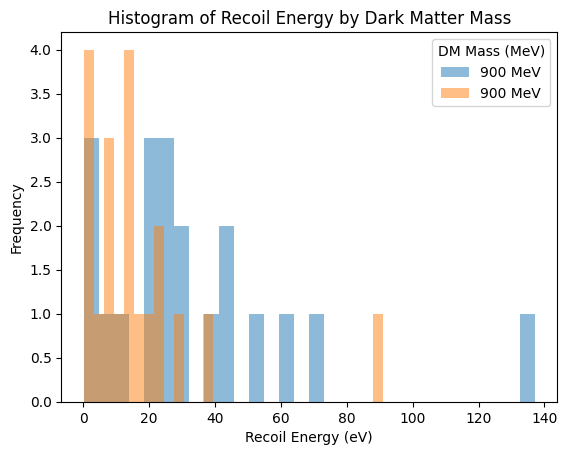

In [22]:
dm_mass = 900
filtered_data = salting_dataframe[salting_dataframe['salt_dm_mass_MeV'] == dm_mass]
plt.hist(filtered_data['salt_recoil_energy_eV'], bins=30, alpha=0.5, label=f"{dm_mass} MeV")
plt.hist(filtered_data['salt_energy_eV_Mv3025pcRegular'], bins=30, alpha=0.5, label=f"{dm_mass} MeV")
plt.xlabel('Recoil Energy (eV)')
plt.ylabel('Frequency')
plt.title('Histogram of Recoil Energy by Dark Matter Mass')
plt.legend(title='DM Mass (MeV)')
plt.show()

In [23]:
salts,filtsalts = salting.generate_salt(chan,
                        noise_tag=noise_tag,
                        template_tag=template_tag,
                        dpdi_tag=dpdi_tag,
                        dpdi_poles=dpdi_poles,
                        energies=energies,
                        PCE = pce,
                        pdf_file=pdf_file,
                        nevents=20)

INFO: Loading filter data from file /home/michael/salting/detprocess/examples/r46testfilterfile.hdf5
dict_keys(['Mv3025pcRegular|Mv3025pcBigFins', 'Mv3025pcRegular', 'Mv3025pcBigFins'])
dict_keys(['csd_default', 'csd_default_metadata', 'csd_freqs_default', 'csd_freqs_default_metadata', 'template_shared_2x2_inds', 'template_shared_2x2_inds_metadata', 'template_shared_2x2', 'template_shared_2x2_metadata', 'template_shared_Mv3025pcBigFins_inds', 'template_shared_Mv3025pcBigFins_inds_metadata', 'template_shared_Mv3025pcBigFins', 'template_shared_Mv3025pcBigFins_metadata', 'template_shared_Mv3025pcRegular_inds', 'template_shared_Mv3025pcRegular_inds_metadata', 'template_shared_Mv3025pcRegular', 'template_shared_Mv3025pcRegular_metadata', 'template_single_Mv3025pcBigFins_inds', 'template_single_Mv3025pcBigFins_inds_metadata', 'template_single_Mv3025pcBigFins', 'template_single_Mv3025pcBigFins_metadata', 'template_single_Mv3025pcRegular_inds', 'template_single_Mv3025pcRegular_inds_metadata', 

In [24]:
chan = "Mv3025pcBigFins"
template_tag = 'default'
noise_tag = "default"
pce = [0.4]
dpdi_tag = "default"
dpdi_poles = 3

In [25]:
#salting.load_hdf5('./r46testfilterfile.hdf5')
#salting.load_hdf5(didv_file)

In [26]:
salts,filtsalts = salting.generate_salt(chan,
                        noise_tag=noise_tag,
                        template_tag=template_tag,
                        dpdi_tag=dpdi_tag,
                        dpdi_poles=dpdi_poles,
                        energies=energies,
                        PCE = pce,
                        pdf_file=pdf_file,
                        nevents=100)

INFO: Loading filter data from file /home/michael/salting/detprocess/examples/r46testfilterfile.hdf5
dict_keys(['Mv3025pcRegular|Mv3025pcBigFins', 'Mv3025pcRegular', 'Mv3025pcBigFins'])
dict_keys(['psd_default', 'psd_default_metadata', 'template_default', 'template_default_metadata', 'template_singles', 'template_singles_metadata'])
dict_keys(['Mv3025pcRegular|Mv3025pcBigFins', 'Mv3025pcRegular', 'Mv3025pcBigFins'])
dict_keys(['psd_default', 'psd_default_metadata', 'template_default', 'template_default_metadata', 'template_singles', 'template_singles_metadata'])
INFO: Loading filter data from file /home/michael/salting/run46tests/pylelab_run46_analysis/didvBOTHCHAN.hdf5
dict_keys(['Mv3025pcRegular|Mv3025pcBigFins', 'Mv3025pcRegular', 'Mv3025pcBigFins'])
dict_keys(['didv_results_2poles_biasparams_default', 'didv_results_2poles_biasparams_default_metadata', 'didv_results_2poles_errors_default', 'didv_results_2poles_errors_default_metadata', 'didv_results_2poles_fit_default', 'didv_result

In [27]:
salting_dataframe = salting.get_dataframe()

In [28]:
salting_dataframe

#,series_number,event_number,dump_number,event_time,series_start_time,group_start_time,fridge_run_start_time,fridge_run_number,trigger_index,trigger_time,trigger_type,data_type,group_name,processing_id,trigger_prod_id,trigger_prod_group_name,salt_template_tag,salt_dm_mass_MeV,salt_recoil_energy_eV,salt_amplitude_Mv3025pcRegular,salt_amplitude_Mv3025pcBigFins,salt_filt_amplitude_Mv3025pcRegular,salt_filt_amplitude_Mv3025pcBigFins,salt_energy_eV_Mv3025pcRegular,salt_energy_eV_Mv3025pcBigFins
0,220240620165258,100001,1,1718927591,13,95,291191,46,674167,0.5393336,3,Test,continuous_I2_D20240620_T165135,0.0,1,0.0,shared_Mv3025pcRegular,10,0.058241102622433295,4.486989203993542e-10,2.600063267408871e-10,0.014877896112924234,0.006313908702036813,0.03719474028231058,0.02104636234012271
1,220240620165258,100001,1,1718927591,13,95,291191,46,811217,0.6489736,3,Test,continuous_I2_D20240620_T165135,0.0,2,0.0,shared_Mv3025pcRegular,10,0.02485788117465176,1.2027468536083665e-10,1.8392299558934093e-10,0.003988051213095259,0.004466325942574085,0.009970128032738146,0.014887753141913616
2,220240620165258,100001,1,1718927591,13,95,291191,46,1150101,0.9200808,3,Test,continuous_I2_D20240620_T165135,0.0,3,0.0,shared_Mv3025pcRegular,10,0.1036260718684597,7.968307104687503e-10,4.6417691347870686e-10,0.02642120136903886,0.011271920533758766,0.06605300342259715,0.037573068445862556
3,220240620165258,100001,1,1718927593,15,97,291193,46,3446359,2.7570872,3,Test,continuous_I2_D20240620_T165135,0.0,4,0.0,shared_Mv3025pcRegular,10,0.08515500550388551,4.659121287792498e-10,5.748724465392847e-10,0.015448649271452609,0.013960014697576194,0.03862162317863152,0.04653338232525398
4,220240620165258,100001,1,1718927594,16,98,291194,46,4965099,3.9720792,3,Test,continuous_I2_D20240620_T165135,0.0,5,0.0,shared_Mv3025pcRegular,10,0.076464789688174,5.853097070653811e-10,3.4524116985317795e-10,0.019407617490709232,0.008383723788420273,0.04851904372677308,0.02794574596140091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2,485",220240620165258,300008,3,1718927889,311,393,291489,46,10842818,8.6742544,3,Test,continuous_I2_D20240620_T165135,0.0,1766,0.0,default,900,8.22959099349948,0.0,1.3555759677737652e-07,0.0,3.2918363973997913,0.0,8.22959099349948
"2,486",220240620165258,300008,3,1718927889,311,393,291489,46,11066985,8.853588,3,Test,continuous_I2_D20240620_T165135,0.0,1767,0.0,default,900,2.4203540284609635,0.0,3.986800506948316e-08,0.0,0.9681416113843853,0.0,2.4203540284609635
"2,487",220240620165258,300008,3,1718927889,311,393,291489,46,11099992,8.8799936,3,Test,continuous_I2_D20240620_T165135,0.0,1768,0.0,default,900,31.456158584361475,0.0,5.181449800983178e-07,0.0,12.58246343374459,0.0,31.456158584361475
"2,488",220240620165258,300008,3,1718927889,311,393,291489,46,11496711,9.1973688,3,Test,continuous_I2_D20240620_T165135,0.0,1769,0.0,default,900,25.715261231066933,0.0,4.2358107659777643e-07,0.0,10.286104492426773,0.0,25.715261231066933
